In [76]:
import cv2 
import matplotlib.pyplot as plt



In [77]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [78]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [79]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [80]:
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [81]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)  # 225/2 = 127.5
model.setInputMean((127.5,127.5,127.5))  # mobilenet takes input as [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000132AE7E7370>

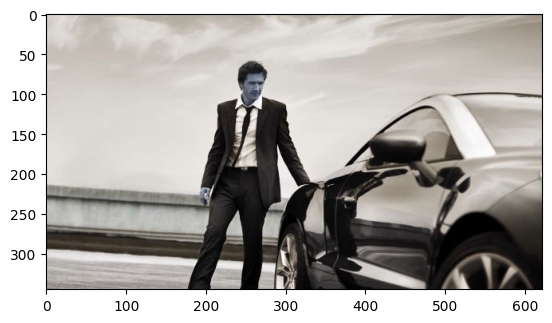

In [82]:
img=cv2.imread('s1.jpg')
plt.imshow(img)

In [83]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [84]:

print(ClassIndex)

[3 1]


In [85]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes,(225, 0,0), 2)
    cv2.putText(img, classLabels[classInd-1],(boxes[0]+10, boxes[1]+40), font,fontScale=font_scale, color=(0,225,0), thickness = 3 )

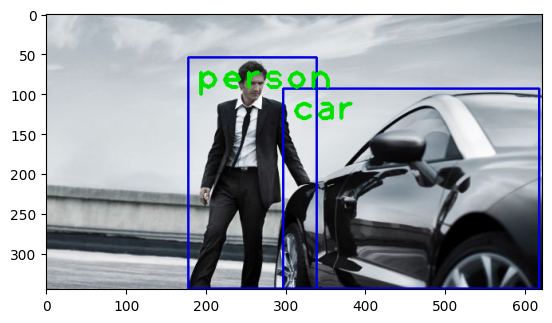

In [88]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## FOR INPUT VIDEO


In [93]:
cap = cv2.VideoCapture("Road traffic video for object detection and tracking.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for classInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
            if(classInd<=80):
                cv2.rectangle(frame, boxes,(225,0,0),2)
                cv2.putText(frame,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(225,0,0))

    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

    

[3 3 3 8 3]
[3 3 3]
[3 3 3 8]
[3 3 8 3]
[3 3 7]
[3 3 3 3 8 3]
[3 3 3 8]
[3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3]
[3 3]
[3 3 6 8 3]
[3 3]
[3 3]
[3 3]
[3 3 3]
[3 3]
[3 3 3]
[3]
[3]
[3 3 3]
[3]
[3 3]
[3 3 3]
()
[3]
[3]
[3]
[3 3]
[3 3]
[3 3]
()
()
[3 3 8 3]
[3 3 8]
[3 3 3]
[3 8]
[3 3]
[3 3 3]
[3 3]
[3 3 3 6]
[3 3]
[3 3]
[3]
[3 3]
[3]
[3]
()
()
[3]
()
[6]
[6]
[6 6]
[6 3]
[3 6]
[3 6]
[6 3 3]
[3 6 3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3 3 3]
[3 3]
[3 3 3]
[3 3 3]
[3 7 3]
[7 3 3]
[7 3]
[7 3]
[3 7 3]
[3 7 3]
[3 7]
[3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3 3]
[3 3]
[3 3]
[3 3]
[3 3]
[3]
[3]
[3]
[3 7 3]
[3 7 3]
[3 3 7]
[3 7 3]
[6 3 3]
[3 6 3]
[6 3 3 3]
[3 6 3 3]
[3 6 3]
[3]
[3 3]
[3 3]
[3]
[3]
[3]
[7 3 3]
[7 3 7]
[7 3]
[3 7]
[7 3]
[7 3 7]
[3 3 7]
[3 7 7]
[3 7 7]
[7 3 7]
[3 7 3]
[3 7 3]
[7 3]
[7 3 3 3]
[3 7]
[7 3]
[7 3]
[7 3]
[7 3]
[7 3 3]
[3 7]
[3 7]
[3 7]
[3 7]
[3 7]
[3 7]
[3 7]
[3 7 3]
[3 7 3]
[3 7 3]


KeyboardInterrupt: 

## FOR WEBCAM

In [98]:
cap = cv2.VideoCapture(0)  
if not cap.isOpened():
    cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for classInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
            if(classInd<=80):
                cv2.rectangle(frame, boxes,(225,0,0),2)
                cv2.putText(frame,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(225,0,0))

    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

    

()
()
()
()
()
()
[1]
[1]
[1]
[ 1  1 77]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 72]
[1 1]
[1 1]
[ 1  1 72]
[ 1  1 72]
[1 1]
[1 1]
[1 1]
[ 1  1 72]
[ 1  1 72]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[ 1  1 72]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1  1 72]
[ 1  1 72]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]

KeyboardInterrupt: 